### <p style="text-align: right;"> &#9989; Xinyi Lou.</p>

# Homework Assignment #3 (Individual)
Goals for this homework assignment

By the end of this assignment, you should be able to:
- Continue developing functions to break down the steps in solving a problem
- Work with multi-dimensional arrays
- Improve your skills in using numpy
- Get some basic experience with Image Processing
- Learn convolution

### Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **30 points** possible on this assignment. Point values for each part are included in the section headers.

This assignment is due at **11:59 pm on Sunday, October 20**. It should be uploaded into the "Homework Assignments" submission folder for Homework #3. Submission instructions can be found at the end of the notebook.


---
## Before you begin: Add to your Git repository to track your progress on your assignment (5 points)

For this assignment, you're going to add it to the `cmse202-f19-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to:

1. Navigate to your `cmse202-f19-turnin` repository and create a new directory called `hw-03`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Make sure you've added your Professor and your TA as collaborators to your "turnin" respository with "Read" access so that we can see your assignment.

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f19-turnin`" repository inside the `hw-03` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

---
## Digital Images

The video below can help you remember a bit about how a digital image is represented

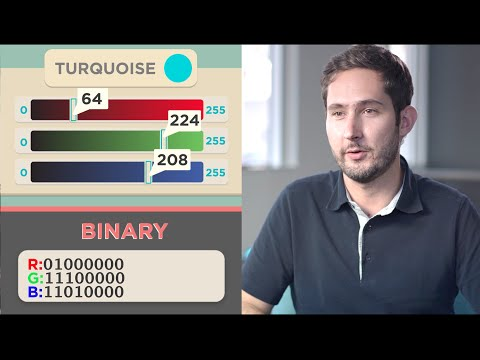

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("15aqFQQVBWU",width=640,height=360)

Some important aspects of digital images (with respect to display on a video screen specifically):

An image is represented as a matrix of values where each value represents the display content for an individual pixel on a digital screen
- the dimensions of the matrix are the dimensions of the pixels that constitute image. That is, each value maps to a particular pixel
- If the image is a *greyscale* image (no color, only shades of grey), then we use 2D matrix where the 2D location is the location of the pixel in the image and the value at that 2D location is greyscale value. Greyscale values range between 0-255, where 0 is black and 255 is white. Each pixel takes on a greyscale value based on those integer values
- If the image is a *color* image, then (typically) the array is a 3D matrix where the third dimension has three values representing the red, green and blue content of that pixel. Each color *channel* takes on a value between 0-255

Images below from https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html

<table> <tr> 
    <td> <img src="https://i.imgur.com/4jDEygv.png" width=500> </td> 
    <td> <img src="https://i.imgur.com/1jwpnE1.png"> </td> 
</tr> </table>

## Working with Images in Python

It turns out that there are a number of ways to work in an image in Python. However, too many choices can make things confusing so I'm going to pick a particular approach. Feel free to explore others.

There is an imaging library know as `PIL` (caps matter here). What's weird about `PIL` is that it represents an old library that was abandoned but later picked up (forked to be computer-sciencey) under the name *pillow* . However, `pillow` is imported using the old name `PIL` to maintain compatibiliy with old code. So you have to be careful that you have `pillow` as a library even though we still `import PIL`. Anaconda has done that for us but it is good to know, especially if you look up reference material (which should be under *pillow*, not *PIL*). Get all that?

There are only a couple of aspects we need of pillow/PIL for our work, and here they are:

- we would really like to use the `Image` class in `PIL`, so we need to `import Image from PIL`. Again, caps matter here
- the `Image.open(filename)` will return an `Image` instance from an image file, assuming it can find the file
- if you create an `Image` instance, let's call it `img`, then `img.show()` should display the image. (Note: it should pop up a window outside of your notebook)
- to gather the underlying matrix from the image instance `img`, you can use `numpy` (which you obviously have to import), as in `numpy.asarray(img)`
- to create an image instance from a matrix, you can do `Image.fromarray(yourarray)`
- to convert an image from greyscale to RGB(color) you use the `.convert` method. 
   - `img.convert('L')` ("L" for luminosity) returns a greyscale image. 
   - `img.convert('RGB')` returns a color image

There are clearly lots of other things you can do, but this should get us started. 

---
### Exercise, 5 pts

I provide a little image for us to work with from https://en.wikipedia.org/wiki/Kernel_(image_processing). I named the image `oscar.png` (he looks like an oscar). Write code to do the following:

1. open `oscar.png` as described
1. display the image (should be in color)
1. convert the image to greyscale.
1. get the underlying matrix from the greyscale image and print its shape
1. change the middle pixel of the matrix to be pure black. This is not as easy as it sounds because you cannot, by default, write to the array. You need to make a copy and then write. How do you make a copy of a NumPy array?
1. create a new image from the array and display it. Greyscale Oscar should have a little black dot in the middle of its face. (you might have to make the image a lot larger to see the dot, the oscar image is a small image)

In [1]:
## write your code here
from PIL import Image 
import numpy as np
oscar = Image.open("oscar.png")
oscar.show()

oscar_grey = oscar.convert('L')
oscar_asarray = np.asarray(oscar_grey)
oscar_asarray

array([[131, 127, 123, ..., 142, 140, 142],
       [129, 138, 124, ..., 144, 135, 142],
       [136, 143, 152, ..., 144, 137, 142],
       ...,
       [125, 126, 126, ..., 127, 123, 122],
       [125, 125, 127, ..., 136, 130, 122],
       [125, 127, 128, ..., 118, 132, 119]], dtype=uint8)

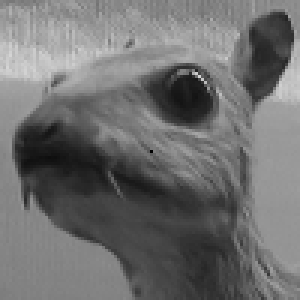

In [2]:
# make copy
oscar_copy_array = oscar_asarray.copy()
mid = int(len(oscar_copy_array)/2)
# change middle pixel to black
oscar_copy_array[mid,mid] = 0
new_oscar = oscar_copy_array
new_oscar_pic = Image.fromarray(new_oscar)
new_oscar_pic.resize(size= (300,300))

---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished first exercise", and push the changes to GitHub.

---

---
## Working with numpy

We've worked with numpy before but it's good to remember some of the basics and potentially introduce some new elements we have either forgotten or not worked with before. **Review the following code and make sure you understand all of it**.

In [3]:
import numpy as np
lst = [1,2,3]
ary = np.array(lst)      # make an array from a list
print(ary)
# 2D array, explictly set the type to float
ary2d = np.array([ [1,2,3], [4,5,6], [7,8,9], [10,11,12]], dtype=np.float64)
print(ary2d)

[1 2 3]
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]


### Making arrays

There are a lot of ways to make some default arrays. You can look at the docs but here are some useful ones:

- `np.arange(start, stop, increment)` make an array with value from `start` up to *but not including* `stop` as incremented by `increment`
- `np.linspace(start, stop, count)` creates `count` values evenly spaced between `start` and `stop` *inclusive*
- you can rehape a range to a particular dimension. `np.arange(27).reshape(3,3,3)` creates a 3D array of 3 rows, each row with 3 column, each column with 3 values. The value `27` implies the range of `0,27,1`
- you can make various special arrays:
   - `np.zeros( tuple )` creates an array of zeros in the shape indicated by the tuple
   - `np.ones( tuple )` like `zeros` except fills the array with ones
   - `np.zeros_like(ary)` creates an array of the same size and shape as `ary`
   - `np.ones_like(ary)` same as `zeros_like` but with ones.
   - `np.full( tuple, value)` create an array in the shape ov `tuple` put `value` in each location

### Slicing

We can "slice" a numpy array in various ways to gather rows or columns or some subset of the numpy array which is very useful. One thing to remember is the idea of a range as indicated by the `:`. A `:` by itself is the entire index range, a value like `0:2` is the index range from 0 *up to but not including 2* . We also remember that indexing begins with 0: thus the first element in the index is at row 0. We can also use `-1` (or some other negative value) to index starting with the last value. 

We index into the array using multiple `[ ]` operators or commas in the `[ ]`. Thus `ary2d[0][1]` is the first row, 2nd value in the row. We can have as many `[ ]` operators as there are dimensions in the array. Instead of multiple `[ ]` we can also use commas within the brackets. Thus `ary2d[0,0]` and `ary2d[0][0]` are equivalent. The comma approach is typically used.

Continuing with our `array2d` from above **review the following code and make sure you understand it**:

In [4]:
slice = ary2d[:,0]  # for all rows, only the first column
print(slice)
slice = ary2d[0:2, 0:2] # rows 0 and 1, of those rows columns 0 and 1
print(slice)

[ 1.  4.  7. 10.]
[[1. 2.]
 [4. 5.]]


### Array operators

We can use regular arithmetic operators with NumPy arrays, but we have to understand what those operators mean. 

- if we use an operator on an array with a single value, we are asking numpy to apply that operator, with the single value operator, on *each value* in the array, yielding a new array. 
- if we use an operator on two arrays *of the same shape*, then each element uses the operator on its associated argument creating a new array of the same shape and size
- you can assign one array to another, but you must have the same shapes. You can assign a smaller array into a larger array if you specify the smaller arrays shape as the target of where to put it in the larger array

Again, **review the following code and make sure you understand it**.

In [5]:
ary2d_times3 = ary2d * 3.0
print(ary2d_times3)
ary2d_squares = ary2d * ary2d
print(ary2d_squares)
ary2d_shape = ary2d.shape
zeros = np.zeros( (ary2d_shape[0] + 1, ary2d_shape[1]+1) )
zeros[0:-1, 0:-1] = ary2d # slice and ary2d shape match
print(zeros)

[[ 3.  6.  9.]
 [12. 15. 18.]
 [21. 24. 27.]
 [30. 33. 36.]]
[[  1.   4.   9.]
 [ 16.  25.  36.]
 [ 49.  64.  81.]
 [100. 121. 144.]]
[[ 1.  2.  3.  0.]
 [ 4.  5.  6.  0.]
 [ 7.  8.  9.  0.]
 [10. 11. 12.  0.]
 [ 0.  0.  0.  0.]]


---
### Exercise, 5 pts

Let's see if we can do some NumPy manipulation to get us ready for the main problem. Do the following:

1. extract the greyscale array from oscar.png as above into `ary`
1. create an array `slice`, a 4x4 array from the top, left corner of `ary`
    - print `slice`
1. multiply every element of `slice` by 2
    - print the new array

In [6]:
# write your code here
# 1. extract the greyscale array from oscar.png as above into ary
ary = oscar_asarray

# 2. create an array slice, a 4x4 array from the top, left corner of ary
slice = ary[0:4, 0:4]
print(slice)

# 3. multiply every element of slice by 2
slice_mul2 = slice * 2
print(slice_mul2)

[[131 127 123 120]
 [129 138 124 144]
 [136 143 152 169]
 [160 161 147 174]]
[[  6 254 246 240]
 [  2  20 248  32]
 [ 16  30  48  82]
 [ 64  66  38  92]]


When you print `slice * 2`, did you get the values you expected? Why or why not?
**Hint** look at `ary.dtype` and `slice.dtype`. What are the range of values for that type? What happens if you go above or below that type's max/min (try it)? If you were to explicitly make `slice` a different type (look up how you would do that, perhaps np.int64), do you get the values you expect? Answer these questions below.

In [7]:
print(ary.dtype)
print(slice.dtype)
slice = slice.astype('int64')
slice_mul2_corr = slice * 2
print(slice_mul2_corr)

uint8
uint8
[[262 254 246 240]
 [258 276 248 288]
 [272 286 304 338]
 [320 322 294 348]]


<font size="20px">&#9998;</font> No, if I just did slice*2, the result is not what I expected. 

`ary.dtype` and `slice.dtype` are unit8, which range are unsigned integer (0 to 255). 

If the value is go above 255, the part which are higher than 255 will be calculated begin from 0. 

After I change to type'int64', the result is what I expected.

#### Continuing on:

1. create a 3x3 array `mask` where each value in the array has the value 3
   - don't make it by hand, use a numpy operation
   - make its `dtype` `np.int64`
   - print `mask`
1. create `product` by multiplying `mask` by the top left of `slice`. Match the shapes!
   - print `product`
1. assign `product` the value of the bottom right portion of `slice` * `mask`
   - print `product`
1. assign to `slice` in the top,left corner the value of `mask`
   - print `slice`

In [8]:
## write your code here
array_three = np.full( [3,3], 3)
mask = array_three.astype('int64')
print(mask)

product = mask * slice[0:3, 0:3]
print(product)

product = product[-1,-1]
print(product)

slice[0:-1, 0:-1] = mask
print(slice)

[[3 3 3]
 [3 3 3]
 [3 3 3]]
[[393 381 369]
 [387 414 372]
 [408 429 456]]
456
[[  3   3   3 120]
 [  3   3   3 144]
 [  3   3   3 169]
 [160 161 147 174]]


---
### STOP
Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Finished second exercise", and push the changes to GitHub.

---

---
## Convolution

We did all this so we could get to the real problem: image convolution. Image convolution involves "filtering" each value of an image array through a much smaller array called variously a mask, a filter, a kernel. In so doing the values of each element in image array is modified. Let's look at a picture first:

<img src="https://i.imgur.com/NOHAy38.png">

The idea is simple. To perform the convolution:

1. You create masks (for us, always a 3x3 mask) that we use to filter the image.
1. For each pixel value, we multiply the mask times the 8 neighbors surrounding the pixel and the pixel itself.
1. We then sum up the values of the product and place in the filtered image the resulting value

As the picture shows, it's possible to create a new value that is "out of range" of the 0-255 value assumed by the image. We have choices here, but the easiest thing to do is to **clamp** them: if the value is greater than 255, we set the pixel value to 255; less than 0, set it to 0.

### Exercise, 15 pts

Write the following functions and place them in a script file called "convolve.py". You will submit the script as part of this assignment. **Once you're written your script, important the functions and use them in this notebook to show that they work.**

1. `get_array(fname)` : open the image file represented by `fname`, **return** the greyscale array of that file
    - What happens if the file cannot be opened?
   
1. `convolve (image_array, mask, div=1, whiten=0)` : convolve the `mask` across all the pixels of the `image_array`. After convolution, each new pixel value is subsequently divided by `div` and has the value `whiten` added to it all **before** the value is clamped into range. For the purposes of `div` and `whiten` see below. **Return** a *new image* using the convolved array.

1. a set of four functions that call `convolve` with particular masks. Each returns the image provided by the call to `convolve`

   - `sharpen(image_array)`. Call `convolve` with the 3x3 mask [ [0,-1,0], [-1,5,-1], [0,-1,0] ]
   - `emboss(image_array)` . Call `convolve` with the 3x3 mask [ [-2, -1, 0], [-1, 1, 1], [0, 1, 2]]
   - `edge_detect(image_array)` . Call `convolve` with th 3x3 mask [ [0,1,0], [1,-4,1], [0,1,0] ]. Because these images can get dark, provide a `whiten` argument of 50
   - `blur(image_array)` . Call `convolve` with the 3x3 mask ([ [1,1,1], [1,1,1], [1,1,1]]. Because these images can be over-bright, provide a `div` argument of 9

### Convolution Notes

Here are some things you might want to pay attention to as you work on the convolution part:

**Borders**: The mask can have portions located off the image array, for example when determinng the top,left pixel. Typically one assumes a 0 for values of the image that are outside of the image, but how to enforce that:
- write your multiplication logic to watch for border states
- add 0's as a border all around the image.
The latter is perhaps easier but it requires that you track your movement of the mask and array a little more closely

**Types**: Types have an effect on the operation of arrays. We implied this above with the discussion of `np.int64`. Watch that you are getting what you expect. For example, one kind of bad result are some random "noise" like pixels spread through your image. 

**Test in the small**: If you test your work on a real image, even the oscar image, and it doesn't quite work, how can you determine what went wrong? It can be hard. Skip the image and test on some very small 2D array (5x5) with values that you know and understand. Get that to work and then test an image.

Then test with a small image like oscar. The page https://en.wikipedia.org/wiki/Kernel_(image_processing) should help you see the results you expected.

**Slow**: Python can be slow, even when using numpy to its best advantage. For big images, it can take a few seconds, and if you did it inefficiently even longer. Start with small images, oscar is a good example.

In [9]:
# Import and run your script functions here.
import convolve

def sharpen(image_array):
    mask_s = np.array( [[0,-1,0], [-1,5,-1], [0,-1,0]])
    pic_s = convolve.convolve(image_array,mask_s)
    return (pic_s)
    
def emboss(image_array):
    mask_em = np.array([[-2,-1,0], [-1,1,1], [0,1,2]])
    pic_em = convolve.convolve(image_array,mask_em)
    return (pic_em)
    
def edge_detect(image_array):
    mask_edge = np.array([ [0,1,0], [1,-4,1], [0,1,0] ])
    pic_edge = convolve.convolve(image_array,mask_edge,whiten=50)
    return (pic_edge)
    
def blur(image_array):
    mask_blur = np.array([[1,1,1], [1,1,1], [1,1,1]])
    pic_blur = convolve.convolve(image_array,mask_blur,div=9)
    return (pic_blur)

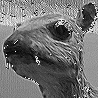

In [10]:
# sharpen
sharpen(oscar_asarray)

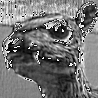

In [11]:
# emboss
emboss(oscar_asarray)

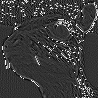

In [12]:
# edge_detect
edge_detect(oscar_asarray)

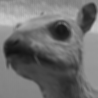

In [13]:
# blur
blur(oscar_asarray)

---
### STOP
Take a moment to save your notebook, **add your script to your repository**, and commit the changes to your Git repository using the commit message "Finished third exercise", and push the changes to GitHub.

---

---
### Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [19]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/42KmqotDw3VTun5y6" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #3, and upload your notebook **and the script you wrote**.

&#169; Copyright 2019,  Michigan State University Board of Trustees